In [1]:
%matplotlib inline
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import hdbscan

In [2]:
x1 = np.load("normal_AR.npy")
x2 = np.load("stiff_dyskinetic_AR.npy")
x3 = np.load("wavy_AR.npy")

In [3]:
import scipy.ndimage as ndimage

In [4]:
x = x1

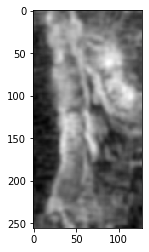

In [5]:
unif = ndimage.uniform_filter(x[0], size = 5)
plt.imshow(unif, cmap = "gray")

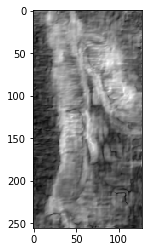

In [6]:
import skimage.filters as skf
plt.imshow(skf.gabor(x[0], 0.75, theta = 90)[0], cmap = "gray")

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


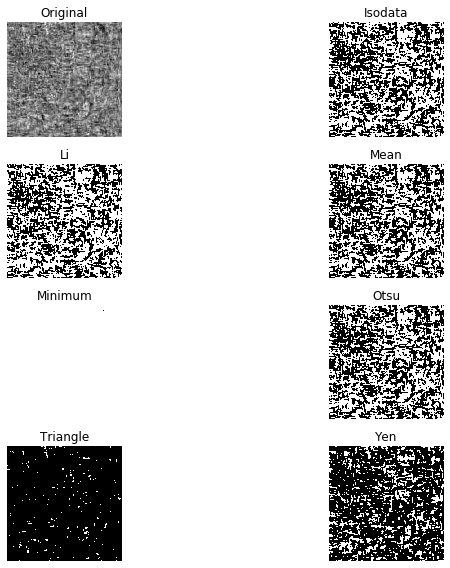

In [32]:
fig, ax = skf.try_all_threshold(x[4], (12, 8))

In [21]:
l2 = ((unif - x[0]) ** 2)

In [22]:
def filt(patch):
    p = patch[int(patch.shape[0] / 2)]
    n_neighbors = patch.shape[0] - 1
    diffs = np.abs(patch - p).sum() / n_neighbors
    return diffs

In [23]:
l1 = ndimage.generic_filter(x[0], filt, size = 3)

In [24]:
l1.shape

(256, 256)

In [25]:
l2.shape

(256, 256)

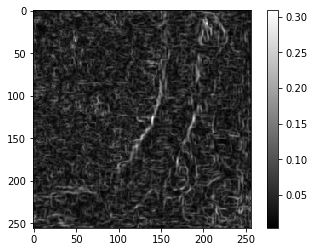

In [26]:
plt.imshow(l1, cmap = "gray")
plt.colorbar()

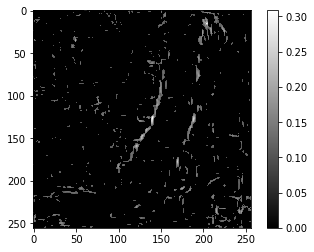

In [27]:
l1[l1 < 0.1] = 0.0
plt.imshow(l1, cmap = "gray")
plt.colorbar()

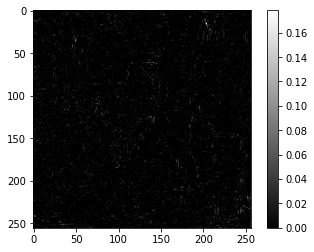

In [28]:
plt.imshow(l2, cmap = "gray")
plt.colorbar()